# Linear Regression

Let us try Linear Regression on our Bakery Sales data

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

# Global plot settings
plt.rcParams['figure.dpi'] = 150   # Set the resolution of the plots to 150 DPI
plt.style.use('fivethirtyeight')

Read the data

In [21]:
df_sales = pd.read_csv("featured_data_categorised.csv", encoding = "utf-8")

In [22]:
df_sales.head()

,id,Datum,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,KielerWoche,Woche,Monat,Wochentag,Feiertag,Jahreszeit,Ferien
0,1307011,2013-07-01,1,148.828353,6.0,17.8375,15.0,cloudy,0,27,7,1,0,3,0
1,1307021,2013-07-02,1,159.793757,3.0,17.3125,10.0,cloudy,0,27,7,2,0,3,0
2,1307031,2013-07-03,1,111.885594,7.0,21.0750,6.0,rainy,0,27,7,3,0,3,0
3,1307041,2013-07-04,1,168.864941,7.0,18.8500,7.0,cloudy,0,27,7,4,0,3,0
4,1307051,2013-07-05,1,171.280754,5.0,19.9750,12.0,cloudy,0,27,7,5,0,3,0


See the data types 

In [23]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9334 entries, 0 to 9333
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   9334 non-null   int64  
 1   Datum                9334 non-null   object 
 2   Warengruppe          9334 non-null   int64  
 3   Umsatz               9334 non-null   float64
 4   Bewoelkung           9334 non-null   float64
 5   Temperatur           9334 non-null   float64
 6   Windgeschwindigkeit  9334 non-null   float64
 7   Wettercode           9334 non-null   object 
 8   KielerWoche          9334 non-null   int64  
 9   Woche                9334 non-null   int64  
 10  Monat                9334 non-null   int64  
 11  Wochentag            9334 non-null   int64  
 12  Feiertag             9334 non-null   int64  
 13  Jahreszeit           9334 non-null   int64  
 14  Ferien               9334 non-null   int64  
dtypes: float64(4), int64(9), object(2)
mem

Let us select the numerical features 

In [24]:
# The filtered data with only numerical features
df_num_feature = df_sales.select_dtypes(include=[np.number])

Visulaizing pairplot is time consuming so commented

In [25]:
#plt.figure(figsize=(8,8))

#sns.pairplot(df_num_feature)

#plt.show()

Viewing the correlation

In [26]:
df_num_feature.corr()

,id,Warengruppe,Umsatz,Bewoelkung,Temperatur,Windgeschwindigkeit,KielerWoche,Woche,Monat,Wochentag,Feiertag,Jahreszeit,Ferien
id,1.000000,-0.019982,-0.086929,-0.012561,-0.069451,0.007995,0.048994,-0.258328,-0.259599,0.008769,0.008158,-0.239954,-0.013388
Warengruppe,-0.019982,1.000000,-0.062589,0.023407,-0.047100,-0.009275,-0.010207,0.080500,0.080817,0.000560,-0.006163,0.060766,-0.024759
Umsatz,-0.086929,-0.062589,1.000000,-0.089354,0.222734,0.014605,0.058244,0.001969,0.013889,0.136199,0.043574,0.016448,0.160374
Bewoelkung,-0.012561,0.023407,-0.089354,1.000000,-0.391237,0.040676,0.011507,0.033908,0.029236,-0.004859,-0.049926,-0.003706,-0.027971
Temperatur,-0.069451,-0.047100,0.222734,-0.391237,1.000000,0.004331,0.138330,0.215817,0.217137,0.004352,0.023315,0.298765,0.203171
Windgeschwindigkeit,0.007995,-0.009275,0.014605,0.040676,0.004331,1.000000,0.020483,-0.097694,-0.103800,-0.005758,0.015749,-0.129420,0.026075
KielerWoche,0.048994,-0.010207,0.058244,0.011507,0.138330,0.020483,1.000000,-0.020214,-0.029593,0.042733,-0.016281,0.005486,-0.098690
Woche,-0.258328,0.080500,0.001969,0.033908,0.215817,-0.097694,-0.020214,1.000000,0.977635,-0.003256,-0.021225,0.867583,0.005945
Monat,-0.259599,0.080817,0.013889,0.029236,0.217137,-0.103800,-0.029593,0.977635,1.000000,0.002053,-0.018182,0.864106,0.000012
Wochentag,0.008769,0.000560,0.136199,-0.004859,0.004352,-0.005758,0.042733,-0.003256,0.002053,1.000000,-0.067638,0.001063,-0.056885


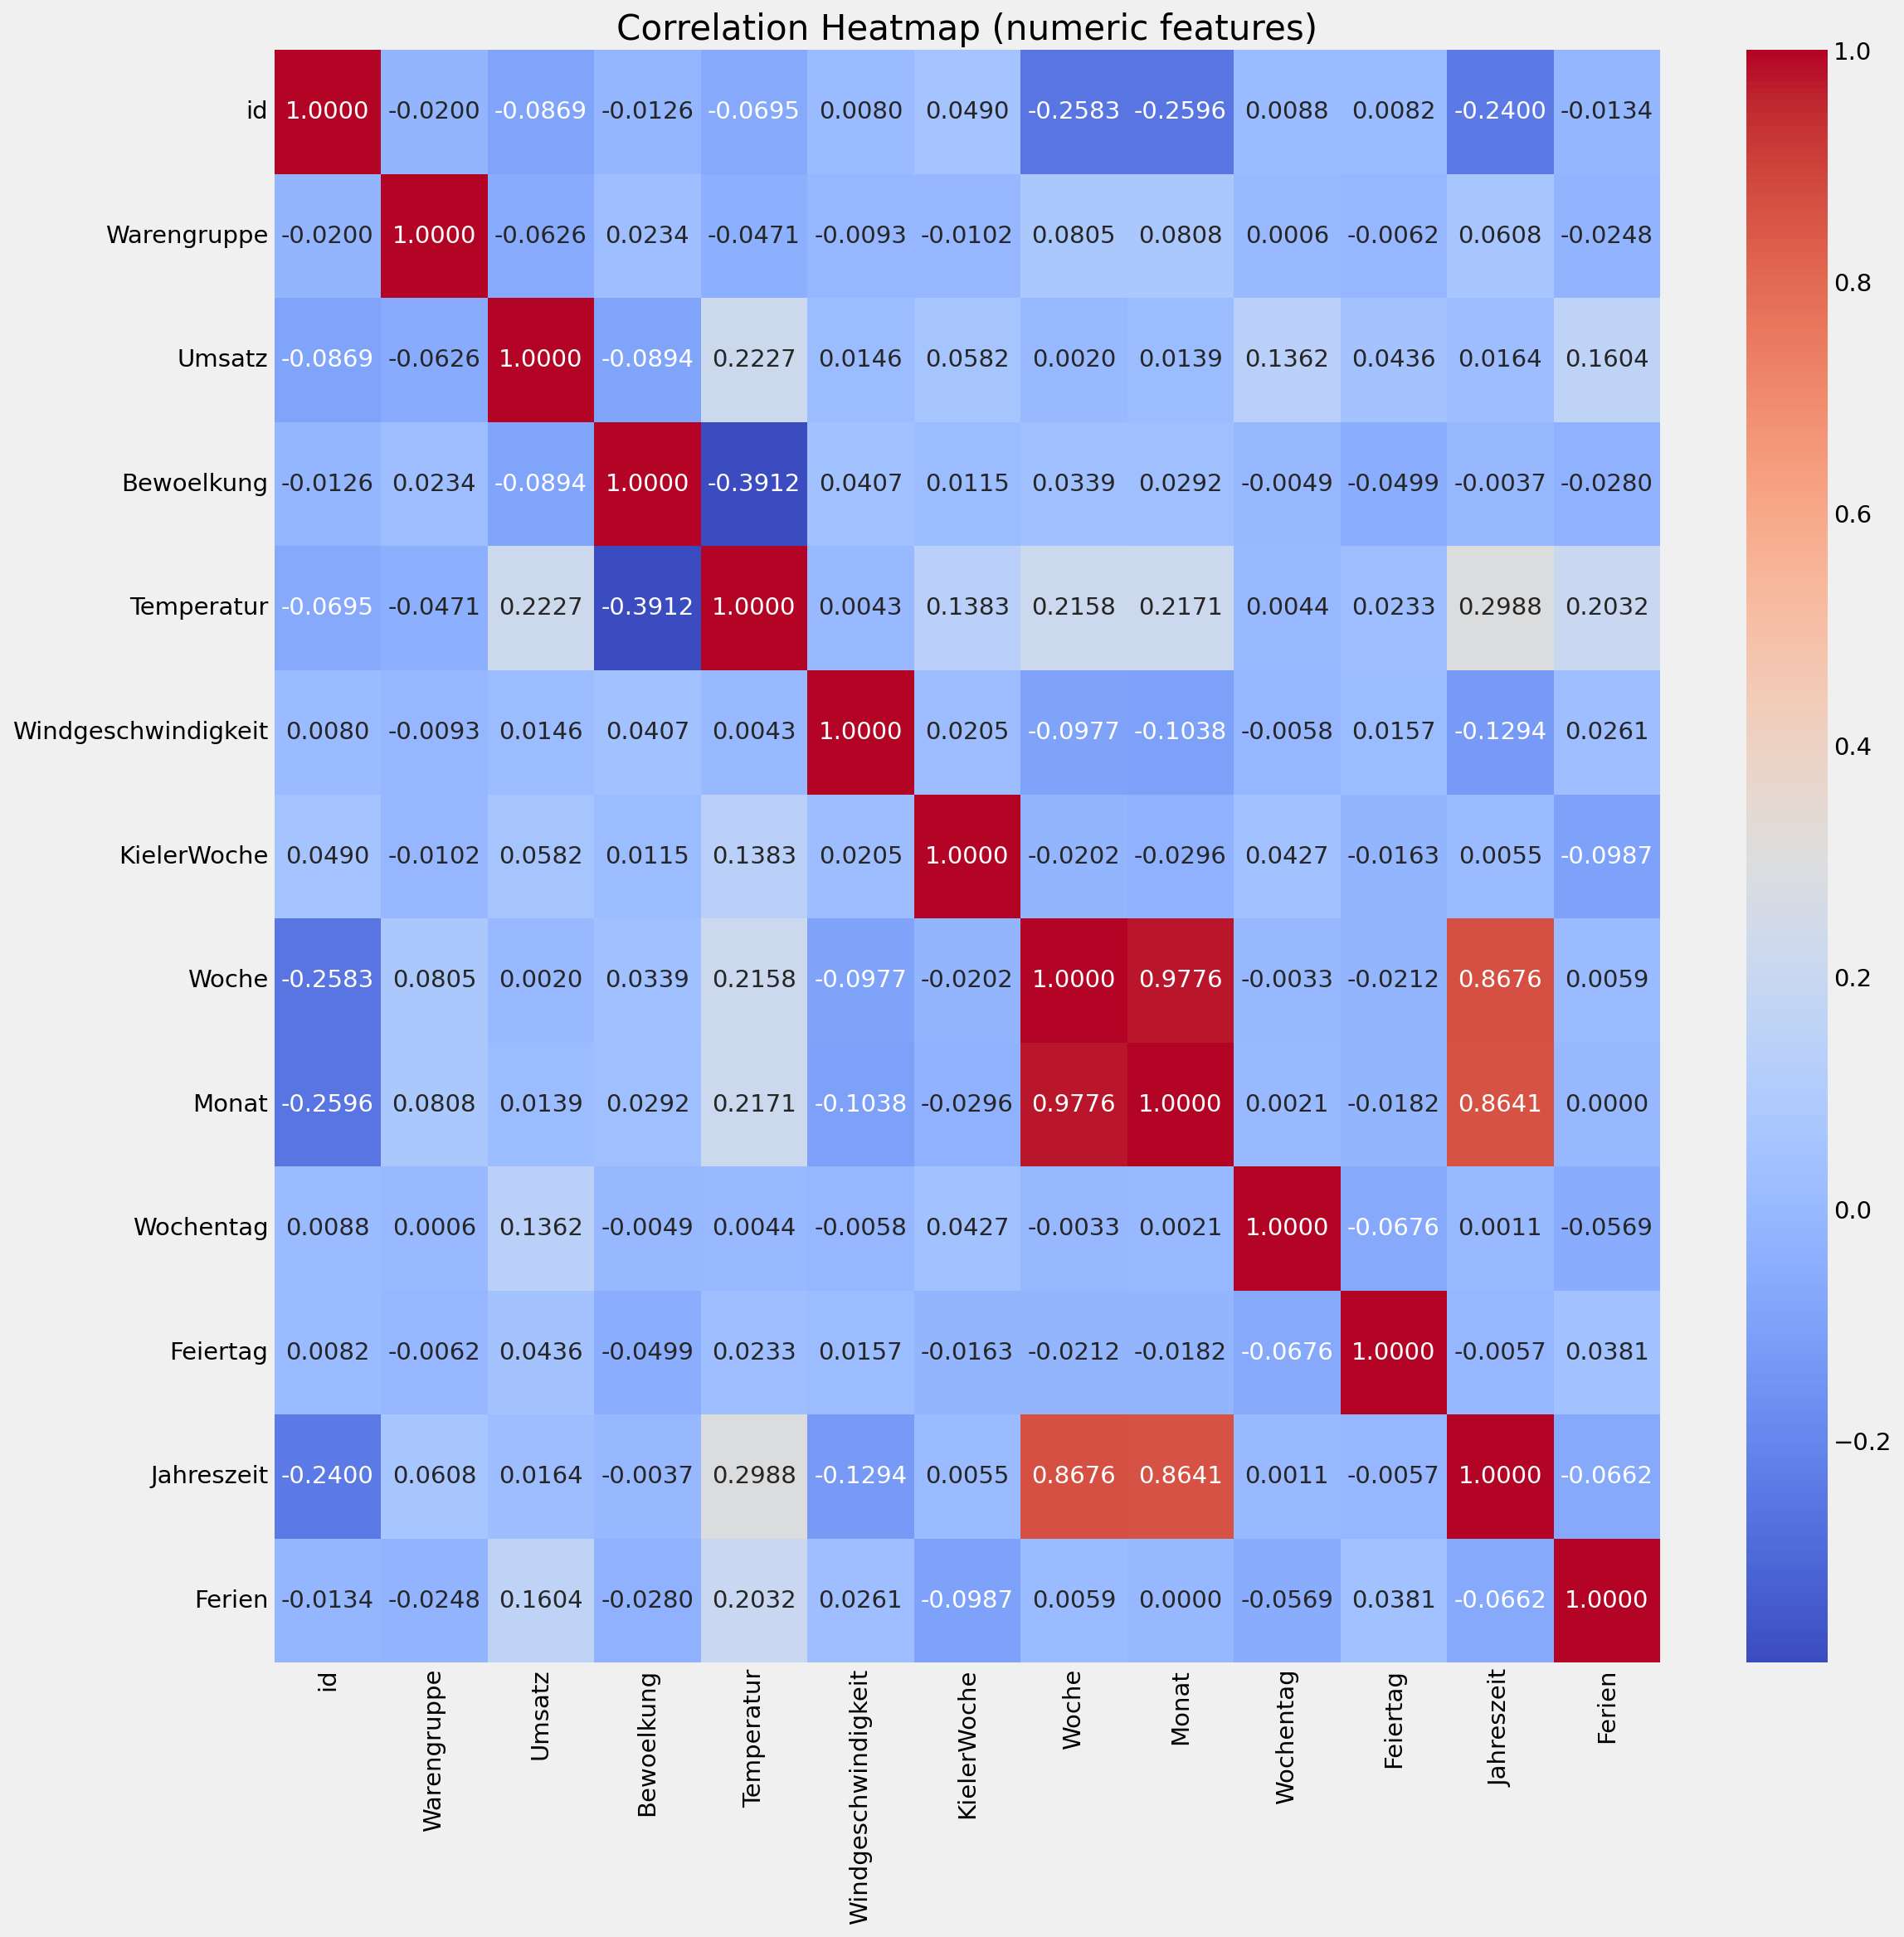

In [27]:
correlation_matrix = df_num_feature.corr()

plt.figure(figsize=(16,16))
sns.heatmap(correlation_matrix, annot=True, fmt=".4f", cmap='coolwarm')
plt.title("Correlation Heatmap (numeric features)")
plt.show()

So , with the current pre-processed data, our dependent variable (Target) , i.e. Umsatz (Revenue) has decent (more than 10%) correlation with 

- Temperature (0.2227)
- Wochentag (0.1362) 
- Ferien (0.1604) aka School Holiday

But may be we should also add the weather code (wettercode) with it. As wettercode is categorical variable, we should use 'one-hot-encoding' to convert it into numerical variable.

The following code snippet is similar to tasks done in *DeepLearningAI Course* reference materials

In [28]:
# we will use the Temperature, Wochentag, Ferien and wettercode as features to predict the sales
predictors = ['Temperatur', 'Wochentag', 'Ferien', 'Wettercode']

# get the dummy variables for the Wettercode column
features_with_dummies = pd.get_dummies(df_sales[predictors], drop_first=True, dtype=int)

features_with_dummies.head()

,Temperatur,Wochentag,Ferien,Wettercode_rainy,Wettercode_sunny,Wettercode_thunderstorm
0,17.8375,1,0,0,0,0
1,17.3125,2,0,0,0,0
2,21.0750,3,0,1,0,0
3,18.8500,4,0,0,0,0
4,19.9750,5,0,0,0,0


In [29]:
# add the constant term
X = sm.add_constant(features_with_dummies)

# get the target variable
Y = df_sales["Umsatz"]

# create the model
model = sm.OLS(Y, X)

# fit the model
results = model.fit()

# print the model summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                 Umsatz   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     142.2
Date:                Tue, 25 Nov 2025   Prob (F-statistic):          3.76e-173
Time:                        16:25:24   Log-Likelihood:                -59259.
No. Observations:                9334   AIC:                         1.185e+05
Df Residuals:                    9327   BIC:                         1.186e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

# ToDo

Add initial analysis -
